In [282]:
# Don't change this cell; just run it. 

import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import pandas as pd

### Crime Dataset

In [283]:
crime=pd.read_csv("Crimes.csv")
crime.head(20)
crime.shape
#MULTIPLE LINEAR REGRESSION

(264732, 22)

In [284]:
#Predict location, time, arrest or not, specific crime happening at a specific place

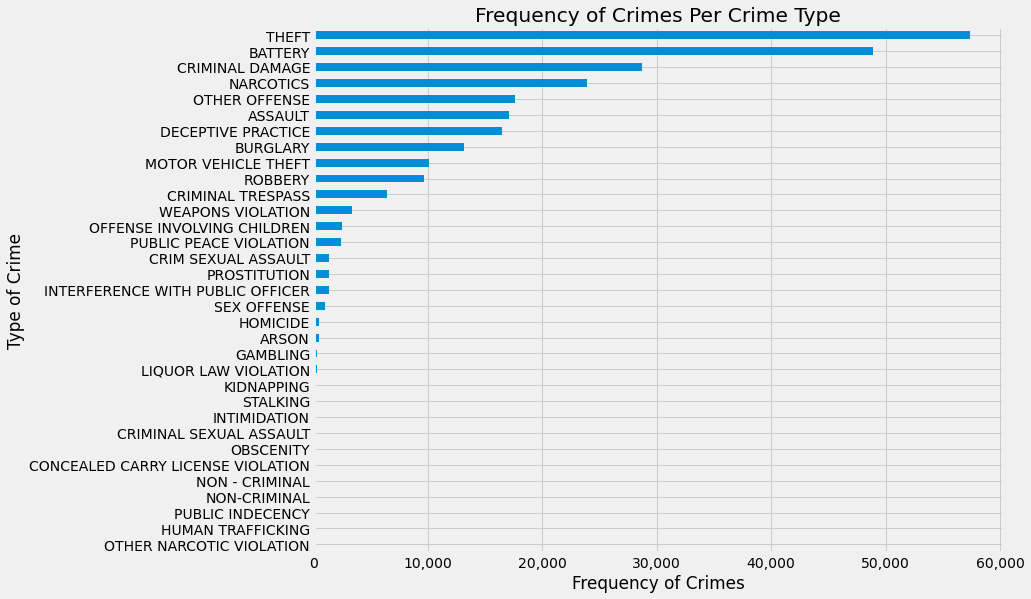

In [285]:
#Frequency of Crimes Per Crime Type
crimeType = crime['Primary Type'].value_counts(ascending=True)

fig=plt.figure(figsize=(11, 9))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crimeType.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

Text(0, 0.5, 'Number of Arrests')

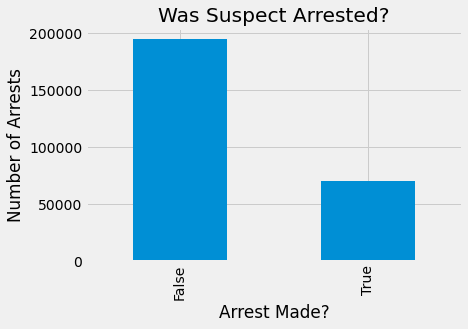

In [286]:
#Graph: Was an arrest made or not?
crime['Arrest'].value_counts().plot(kind='bar')
plt.title("Was Suspect Arrested?")
plt.xlabel("Arrest Made?")
plt.ylabel("Number of Arrests")


In [287]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
3,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
4,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [288]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [289]:
crime['Community Area']

0         61
1         25
2         21
3         25
4         71
          ..
264727    60
264728    62
264729    66
264730    44
264731    14
Name: Community Area, Length: 264732, dtype: int64

### Community Economic Infromation Dataset

In [290]:
economics = pd.read_csv('economics.csv')

In [291]:
economics.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [292]:
economics = economics.rename(columns={"Community Area Number": "Community Area"})

### Merge datasets in new dataframe df

In [293]:
df = crime.merge(economics, on='Community Area', how = 'outer')

#### Convert data column to date time format

In [294]:
df.Date[0]

'09/05/2015 01:30:00 PM'

In [295]:
from datetime import datetime
df['Date'] = pd.to_datetime(crime.Date,format='%m/%d/%Y %I:%M:%S %p') 
df['year']=df.Date.dt.year 
df['month']=df.Date.dt.month 
df['day']=df.Date.dt.day
df['Hour']=df.Date.dt.hour 
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,year,month,day,Hour
0,10224738.0,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,29.0,23.0,41.5,38.9,12765,91.0,2015.0,9.0,5.0,13.0
1,10224832.0,HY411712,2015-09-04 11:30:00,013XX W 50TH ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,29.0,23.0,41.5,38.9,12765,91.0,2015.0,9.0,4.0,11.0
2,10224834.0,HY411767,2015-09-05 12:45:00,051XX S PAULINA ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,29.0,23.0,41.5,38.9,12765,91.0,2015.0,9.0,5.0,12.0
3,10224945.0,HY411865,2015-09-05 13:00:00,053XX S LAFLIN ST,2851,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE PORCH/HALLWAY,True,True,...,29.0,23.0,41.5,38.9,12765,91.0,2015.0,9.0,5.0,13.0
4,10224948.0,HY411788,2015-09-05 10:55:00,051XX S HONORE ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,29.0,23.0,41.5,38.9,12765,91.0,2015.0,9.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264728,9997775.0,HY187876,2015-04-05 00:00:00,034XX E 118TH ST,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,17.1,9.6,19.2,42.9,22677,44.0,2015.0,4.0,5.0,0.0
264729,9998112.0,HY187824,2015-01-01 00:00:00,133XX S BRAINARD AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,17.1,9.6,19.2,42.9,22677,44.0,2015.0,1.0,1.0,0.0
264730,9999725.0,HY189657,2015-04-07 12:00:00,134XX S AVENUE M,1156,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,RESIDENCE,False,False,...,17.1,9.6,19.2,42.9,22677,44.0,2015.0,4.0,7.0,12.0
264731,9993651.0,HY183567,2015-09-24 08:00:00,131XX S BALTIMORE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,17.1,9.6,19.2,42.9,22677,44.0,2015.0,9.0,24.0,8.0


In [296]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'year', 'month', 'day', 'Hour'],
      dtype='object')

In [297]:
df['Community Area'][0]

61.0

In [298]:
df['Community Area'] = df['Community Area'].astype(str)

In [299]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'COMMUNITY AREA NAME', 'PERCENT OF HOUSING CROWDED',
       'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'year', 'month', 'day', 'Hour'],
      dtype='object')

#### Drop NA Values

In [300]:
df = df.dropna()

In [301]:
df10 = df
df13 = df

### Use pandas get dummies to create dummy columns for categorical columns

In [302]:
df = pd.get_dummies(df, columns = ['Arrest','Domestic','Community Area'])

In [303]:
df.shape

(257783, 112)

In [304]:
df.columns.tolist()

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Beat',
 'District',
 'Ward',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location',
 'COMMUNITY AREA NAME',
 'PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER CAPITA INCOME ',
 'HARDSHIP INDEX',
 'year',
 'month',
 'day',
 'Hour',
 'Arrest_False',
 'Arrest_True',
 'Domestic_False',
 'Domestic_True',
 'Community Area_1.0',
 'Community Area_10.0',
 'Community Area_11.0',
 'Community Area_12.0',
 'Community Area_13.0',
 'Community Area_14.0',
 'Community Area_15.0',
 'Community Area_16.0',
 'Community Area_17.0',
 'Community Area_18.0',
 'Community Area_19.0',
 'Community Area_2.0',
 'Community Area_20.0',
 'Community Area_21.0',
 'Community Area_22.0',
 'Community Area_23.0',
 'Communi

In [305]:
# df= df[df.month ==8]

In [306]:
df.shape

(257783, 112)

In [307]:
len(df['PERCENT OF HOUSING CROWDED'].value_counts())

56

In [308]:
df['Primary Type'].value_counts()

THEFT                                56696
BATTERY                              48821
CRIMINAL DAMAGE                      28589
NARCOTICS                            21607
OTHER OFFENSE                        17279
ASSAULT                              16992
DECEPTIVE PRACTICE                   13945
BURGLARY                             13103
MOTOR VEHICLE THEFT                  10003
ROBBERY                               9631
CRIMINAL TRESPASS                     6390
WEAPONS VIOLATION                     3333
PUBLIC PEACE VIOLATION                2414
OFFENSE INVOLVING CHILDREN            2065
PROSTITUTION                          1322
INTERFERENCE WITH PUBLIC OFFICER      1305
CRIM SEXUAL ASSAULT                   1220
SEX OFFENSE                            869
HOMICIDE                               502
ARSON                                  453
GAMBLING                               310
LIQUOR LAW VIOLATION                   291
KIDNAPPING                             189
STALKING   

## get rid of the category 'Other Offense'

In [309]:
df = df[df['Primary Type'].isin(['THEFT', 'BATTERY','CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT','DECEPTIVE PRACTICE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY' ])]


## Seperate the input and outputs columns

In [310]:
x = df.iloc[:, 31:]
y = df['Primary Type']

In [311]:
x.shape

(219387, 81)

In [312]:
y = y.apply(lambda x: 1 if x == 'BATTERY' else 2 if x =='ASSAULT' else 3 if x== 'THEFT' else 4 if x=='BURGLARY' else 5 if x== 'ROBBERY' else 6 if x =='MOTOR VEHICLE THEFT' else 7 if x=='DECEPTIVE PRACTICE' else 8 if x=='CRIMINAL DAMAGE' else 9)

In [313]:
x.columns

Index(['Arrest_False', 'Arrest_True', 'Domestic_False', 'Domestic_True',
       'Community Area_1.0', 'Community Area_10.0', 'Community Area_11.0',
       'Community Area_12.0', 'Community Area_13.0', 'Community Area_14.0',
       'Community Area_15.0', 'Community Area_16.0', 'Community Area_17.0',
       'Community Area_18.0', 'Community Area_19.0', 'Community Area_2.0',
       'Community Area_20.0', 'Community Area_21.0', 'Community Area_22.0',
       'Community Area_23.0', 'Community Area_24.0', 'Community Area_25.0',
       'Community Area_26.0', 'Community Area_27.0', 'Community Area_28.0',
       'Community Area_29.0', 'Community Area_3.0', 'Community Area_30.0',
       'Community Area_31.0', 'Community Area_32.0', 'Community Area_33.0',
       'Community Area_34.0', 'Community Area_35.0', 'Community Area_36.0',
       'Community Area_37.0', 'Community Area_38.0', 'Community Area_39.0',
       'Community Area_4.0', 'Community Area_40.0', 'Community Area_41.0',
       'Community A

In [314]:
len(y)

219387

In [315]:
df.isna

<bound method DataFrame.isna of                 ID Case Number                Date                  Block  \
0       10224738.0    HY411648 2015-09-05 13:30:00        043XX S WOOD ST   
1       10224832.0    HY411712 2015-09-04 11:30:00        013XX W 50TH ST   
2       10224834.0    HY411767 2015-09-05 12:45:00     051XX S PAULINA ST   
4       10224948.0    HY411788 2015-09-05 10:55:00      051XX S HONORE ST   
5       10224968.0    HY411992 2015-09-04 18:00:00    053XX S EMERALD AVE   
...            ...         ...                 ...                    ...   
264727   9995479.0    HY186086 2015-09-01 19:00:00       032XX E 133RD ST   
264728   9997775.0    HY187876 2015-04-05 00:00:00       034XX E 118TH ST   
264729   9998112.0    HY187824 2015-01-01 00:00:00   133XX S BRAINARD AVE   
264730   9999725.0    HY189657 2015-04-07 12:00:00       134XX S AVENUE M   
264731   9993651.0    HY183567 2015-09-24 08:00:00  131XX S BALTIMORE AVE   

        IUCR        Primary Type           

In [316]:
y

0         1
1         3
2         3
4         4
5         1
         ..
264727    7
264728    3
264729    3
264730    7
264731    1
Name: Primary Type, Length: 219387, dtype: int64

In [317]:
y.value_counts()

3    56696
1    48821
8    28589
9    21607
2    16992
7    13945
4    13103
6    10003
5     9631
Name: Primary Type, dtype: int64

In [318]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(handle_unknown='ignore')

# #perform one-hot encoding on 'team' column 
# encoder_df = pd.DataFrame(encoder.fit_transform(y.values.reshape(-1, 1)).toarray())

# #merge one-hot encoded columns back with original DataFrame
# final_df = df.join(encoder_df)

In [319]:
# encoder_df.values

In [320]:
56696/219387

0.2584291685469057

In [321]:
x['PERCENT HOUSEHOLDS BELOW POVERTY']= df['PERCENT HOUSEHOLDS BELOW POVERTY']
x['PERCENT AGED 16+ UNEMPLOYED']= df['PERCENT AGED 16+ UNEMPLOYED']
x['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']= df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']
x['PERCENT OF HOUSING CROWDED']= df['PERCENT OF HOUSING CROWDED']
x['PERCENT AGED UNDER 18 OR OVER 64']= df['PERCENT AGED UNDER 18 OR OVER 64']
x['PER CAPITA INCOME ']= df['PER CAPITA INCOME ' ]
x['HARDSHIP INDEX']= df['HARDSHIP INDEX']

                            

### split data into train and test

In [322]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [328]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = .2, random_state = 10)


### Standardize the data

In [329]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('numeric',StandardScaler(), x.columns)])

In [330]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Basic Machine Learning

In [331]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [332]:
Y_train

169974    6
146037    3
201460    7
140415    3
241239    7
         ..
127658    1
113162    3
218738    1
114620    8
100492    1
Name: Primary Type, Length: 175509, dtype: int64

## Logistic Model

In [333]:
X_train.shape

(175509, 88)

In [334]:
Y_train.shape

(175509,)

In [335]:
logistic_model = LogisticRegression(multi_class="multinomial", verbose = 1).fit(X_train, Y_train)
logistic_predictions = logistic_model.predict(X_test)

logistic_model.score(X_test,Y_test.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s finished


0.4344546241852409

In [336]:
logistic_model.score(X_train,Y_train)

0.43551612737808315

In [303]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, logistic_predictions))

C:\Users\noahb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

            ASSAULT       0.00      0.00      0.00      3447
            BATTERY       0.71      0.50      0.59      9799
           BURGLARY       0.00      0.00      0.00      2624
    CRIMINAL DAMAGE       0.24      0.01      0.02      5756
 DECEPTIVE PRACTICE       0.00      0.00      0.00      2700
MOTOR VEHICLE THEFT       0.00      0.00      0.00      2042
          NARCOTICS       0.59      0.93      0.72      4343
            ROBBERY       0.00      0.00      0.00      1936
              THEFT       0.34      0.90      0.49     11231

           accuracy                           0.43     43878
          macro avg       0.21      0.26      0.20     43878
       weighted avg       0.33      0.43      0.33     43878



C:\Users\noahb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Top ten most important features 

In [359]:
coef = logistic_model.coef_[0]
coef = abs(coef)
coef
dataset = pd.DataFrame({'feature': x.columns, 'weight': list(coef)}, columns=['feature', 'weight'])

dataset = dataset.sort_values(by=['weight'], ascending=False)
dataset.head(10)
# These are the top 10 most important features and their weights.
#There could be colineararity between some of the variables.

,feature,weight
3,Domestic_False,0.456993
4,Domestic_True,0.456993
11,HARDSHIP INDEX,0.234886
9,PERCENT AGED UNDER 18 OR OVER 64,0.104859
7,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,0.084606
5,PERCENT HOUSEHOLDS BELOW POVERTY,0.079443
6,PERCENT AGED 16+ UNEMPLOYED,0.057646
10,PER CAPITA INCOME,0.042998
2,Arrest_True,0.033705
1,Arrest_False,0.033705


# Grid Search for logistic regression to hypertune parameters

In [352]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":[0.001,.009,0.01,.09,1,3], "penalty":["none","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(multi_class='multinomial')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\noahb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (st

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.4337441530186103


## Decision Tree Classifier

In [304]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
tree_predictions = classifier.predict(X_test)
classifier.score(X_test,Y_test)

0.43552577601531517

In [305]:
print(classification_report(Y_test, tree_predictions))

C:\Users\noahb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

            ASSAULT       0.00      0.00      0.00      3447
            BATTERY       0.69      0.51      0.59      9799
           BURGLARY       0.00      0.00      0.00      2624
    CRIMINAL DAMAGE       0.29      0.01      0.01      5756
 DECEPTIVE PRACTICE       0.00      0.00      0.00      2700
MOTOR VEHICLE THEFT       0.00      0.00      0.00      2042
          NARCOTICS       0.59      0.91      0.72      4343
            ROBBERY       0.00      0.00      0.00      1936
              THEFT       0.34      0.90      0.49     11231

           accuracy                           0.44     43878
          macro avg       0.21      0.26      0.20     43878
       weighted avg       0.34      0.44      0.33     43878



C:\Users\noahb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K Neighbors Classifier

In [306]:
k_classifier = KNeighborsClassifier(n_neighbors = 5)
k_classifier.fit(X_train, Y_train)
k_predictions = k_classifier.predict(X_test)
k_classifier.score(X_test,Y_test)

0.3481699257030858

In [307]:
print(classification_report(Y_test, k_predictions))

                     precision    recall  f1-score   support

            ASSAULT       0.09      0.10      0.10      3447
            BATTERY       0.45      0.56      0.50      9799
           BURGLARY       0.11      0.07      0.09      2624
    CRIMINAL DAMAGE       0.18      0.17      0.17      5756
 DECEPTIVE PRACTICE       0.09      0.08      0.09      2700
MOTOR VEHICLE THEFT       0.09      0.03      0.04      2042
          NARCOTICS       0.61      0.68      0.64      4343
            ROBBERY       0.06      0.00      0.01      1936
              THEFT       0.40      0.45      0.42     11231

           accuracy                           0.35     43878
          macro avg       0.23      0.24      0.23     43878
       weighted avg       0.31      0.35      0.33     43878



## Random Forest Classifier

In [308]:
from sklearn.ensemble import RandomForestClassifier

In [309]:
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
forest_predictions = forest.predict(X_test)
forest.score(X_test,Y_test)

0.43552577601531517

In [310]:
print(classification_report(Y_test, forest_predictions))

C:\Users\noahb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

            ASSAULT       0.00      0.00      0.00      3447
            BATTERY       0.69      0.51      0.59      9799
           BURGLARY       0.00      0.00      0.00      2624
    CRIMINAL DAMAGE       0.29      0.01      0.01      5756
 DECEPTIVE PRACTICE       0.00      0.00      0.00      2700
MOTOR VEHICLE THEFT       0.00      0.00      0.00      2042
          NARCOTICS       0.59      0.91      0.72      4343
            ROBBERY       0.00      0.00      0.00      1936
              THEFT       0.34      0.90      0.49     11231

           accuracy                           0.44     43878
          macro avg       0.21      0.26      0.20     43878
       weighted avg       0.34      0.44      0.33     43878



C:\Users\noahb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [311]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [313]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [248]:
params = {
    "loss" : ["squared_hinge", "modified_huber"],
    "alpha" : [0.1],
    "penalty" : ["l2", "l1", "none"],
}

clf = SGDClassifier(max_iter=500)
grid = GridSearchCV(clf, param_grid=params, cv=3, verbose =1)


grid.fit(X_train, Y_train)

print(grid.best_params_) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\noahb\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


KeyboardInterrupt: 

## SGD Classifier

In [64]:
from sklearn.linear_model import SGDClassifier

In [79]:
SGD = SGDClassifier(max_iter=1000, alpha = 0.1, loss = 'modified_huber', penalty = 'none')

SGD.fit(X_train, Y_train)

SGD_predictions = SGD.predict(X_test)
SGD.score(X_test,Y_test)

0.42367473449108894

In [80]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

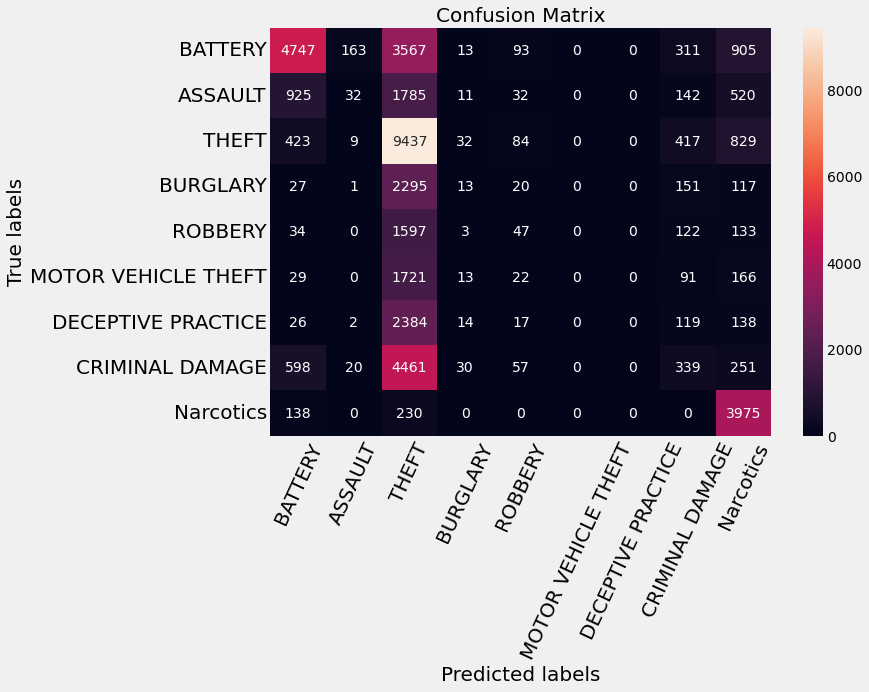

In [190]:
confusion = confusion_matrix(Y_test, SGD_predictions)
labels = ['BATTERY','ASSAULT' , 'THEFT' ,'BURGLARY' ,'ROBBERY' ,'MOTOR VEHICLE THEFT' ,'DECEPTIVE PRACTICE' ,'CRIMINAL DAMAGE','Narcotics']

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax, fmt="d");

ax.set_xlabel('Predicted labels', fontsize=20);
ax.set_ylabel('True labels', fontsize=20); 
ax.set_title('Confusion Matrix', fontsize=20);
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=65)

ax.xaxis.set_ticklabels(labels, fontsize=20);
ax.yaxis.set_ticklabels(labels,fontsize=20);

C:\Users\noahb\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: could not convert string to float: 'HY411648'

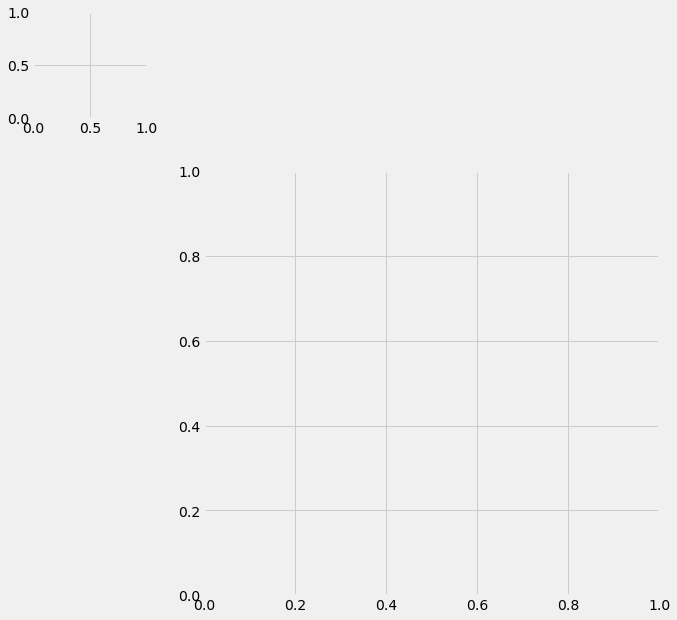

In [232]:
sns.clustermap(df)

# Deep Learning

In [163]:
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np

In [164]:
model = Sequential()

model.add(InputLayer(input_shape = (X_train2.shape[1],) ))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(31, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation ='softmax'))

In [165]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [166]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 50)                4450      
                                                                 
 dropout_12 (Dropout)        (None, 50)                0         
                                                                 
 dense_18 (Dense)            (None, 31)                1581      
                                                                 
 dropout_13 (Dropout)        (None, 31)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                320       
                                                                 
Total params: 6,351
Trainable params: 6,351
Non-trainable params: 0
_________________________________________________________________


In [167]:
y2 = y.apply(lambda x: 1 if x == 'BATTERY' else 2 if x =='ASSAULT' else 3 if x== 'THEFT' else 4 if x=='BURGLARY' else 5 if x== 'ROBBERY' else 6 if x =='MOTOR VEHICLE THEFT' else 7 if x=='DECEPTIVE PRACTICE' else 8 if x=='CRIMINAL DAMAGE' else 9)


In [168]:
y.value_counts()

3    56696
1    48821
8    28589
9    21607
2    16992
7    13945
4    13103
6    10003
5     9631
Name: Primary Type, dtype: int64

In [169]:
y2.value_counts()

9    219387
Name: Primary Type, dtype: int64

In [170]:
len(y2)

219387

In [171]:
89433/(219387)

0.40764949609594003

In [172]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x, y2, test_size = .2, random_state = 10)

In [173]:
model.fit(X_train2, Y_train2, epochs = 5, batch_size = 3, verbose=1)

Epoch 1/5
58503/58503 [==============================] - 173s 3ms/step - loss: 1.1458 - accuracy: 0.9993
Epoch 2/5
58503/58503 [==============================] - 162s 3ms/step - loss: 1.4099e-04 - accuracy: 1.0000
Epoch 3/5
58503/58503 [==============================] - 164s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
58503/58503 [==============================] - 148s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
58503/58503 [==============================] - 164s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [174]:
loss, acc = model.evaluate(X_test2, Y_test2)


1372/1372 [==============================] - 6s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [175]:
loss

0.0

In [176]:
acc

1.0

### Hyper Tuning Neural Network

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

In [ ]:
def func():
    model = Sequential()

    model.add(InputLayer(input_shape = (X_train.shape[1],) ))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(31, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation ='softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

### Randomized Search

In [ ]:
def do_randomized_search():
  param_grid = {'batch_size': sp_randint(1, 16), 'epochs': sp_randint(5, 100)}
  model = KerasClassifier(model=func, verbose=0)
  grid = RandomizedSearchCV(estimator = model, param_distributions=param_grid, scoring = make_scorer(accuracy_score, greater_is_better=True), n_iter = 12)
  grid_result = grid.fit(X_train, Y_train, verbose = 1, callbacks = [es])
  print(grid_result)
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
do_randomized_search()

### Grid Search

In [ ]:
def do_grid_search():    
  batch_size = [2, 4,6,]
  epochs = [5, 10,15]
  model = KerasClassifier(model=func, verbose=0)
  param_grid = dict(batch_size=batch_size, epochs=epochs)
  grid = GridSearchCV(estimator = model, param_grid=param_grid, scoring = make_scorer(accuracy_score, greater_is_better=True),return_train_score = True)
  grid_result = grid.fit(X_train, Y_train, verbose = 1, callbacks = [es])
  print(grid_result)
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

  print("Traininig")
  means = grid_result.cv_results_['mean_train_score']
  stds = grid_result.cv_results_['std_train_score']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
do_grid_search()

In [208]:
logistic_model = LogisticRegression(multi_class="multinomial", verbose = 1).fit(X_train2, Y_train2)
logistic_predictions = logistic_model.predict(X_test2)

logistic_model.score(X_test2,Y_test2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.2s finished


0.7433714141629653

# Logistic model for violent vs non violent crimes

In [371]:
logistic_model = LogisticRegression(multi_class="multinomial", verbose = 1).fit(X_train2, Y_train2)
logistic_predictions = logistic_model.predict(X_test3)

logistic_model.score(X_test2,Y_test2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.6s finished
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.4272528374128265

# Remove community to see if economic factors are soley responsible and not specific community

In [336]:
df10 = pd.get_dummies(df, columns = ['Arrest','Domestic'])

In [337]:
df10 = df10[df10['Primary Type'].isin(['THEFT', 'BATTERY','CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT','DECEPTIVE PRACTICE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY' ])]


## Seperate the input and outputs columns

In [338]:
x = df10.iloc[:, 31:]
y = df10['Primary Type']

In [339]:
x['PERCENT HOUSEHOLDS BELOW POVERTY']= df10['PERCENT HOUSEHOLDS BELOW POVERTY']
x['PERCENT AGED 16+ UNEMPLOYED']= df10['PERCENT AGED 16+ UNEMPLOYED']
x['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']= df10['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']
x['PERCENT OF HOUSING CROWDED']= df['PERCENT OF HOUSING CROWDED']
x['PERCENT AGED UNDER 18 OR OVER 64']= df10['PERCENT AGED UNDER 18 OR OVER 64']
x['PER CAPITA INCOME ']= df10['PER CAPITA INCOME ' ]
x['HARDSHIP INDEX']= df10['HARDSHIP INDEX']

In [345]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(x, y, test_size = .2, random_state = 10)


In [346]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('numeric',StandardScaler(), x.columns)])

In [347]:
X_train3 = ct.fit_transform(X_train3)
X_test3 = ct.transform(X_test3)

# Basic Machine Learning

## Logistic Model

In [348]:
logistic_model = LogisticRegression(multi_class="multinomial", verbose = 1).fit(X_train3, Y_train3)
logistic_predictions = logistic_model.predict(X_test3)

logistic_model.score(X_test3,Y_test3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\noahb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s finished


0.43201604448698666

In [399]:
df13 = df13[df13['Primary Type'].isin(['THEFT', 'BATTERY','CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT','DECEPTIVE PRACTICE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY' ])]


Text(0.5, 1.0, 'Crime Type and Domesticality')

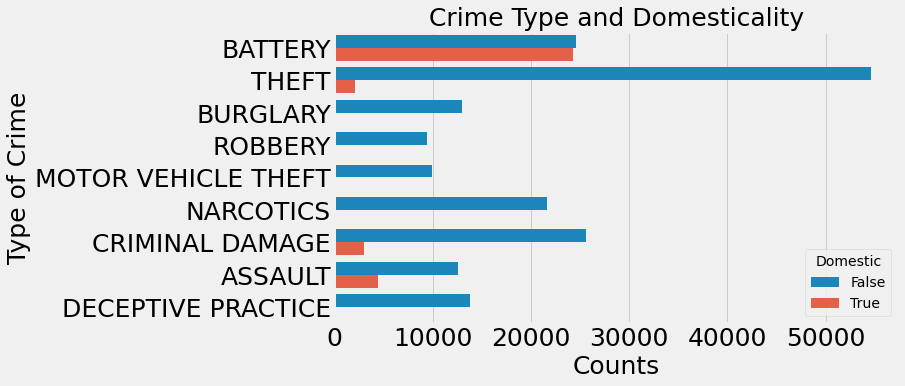

In [411]:
plt.figure(figsize=[9,5])
plot1 = sns.countplot(data=df13, y="Primary Type", hue = 'Domestic')
# plot1.set(xticklabels = ["Mostly A’s","Mostly B’s","Mostly C’s","Mostly D’s"])
plot1.tick_params(axis='both', which='major', labelsize=25)
# plot1.legend(["Yes","No"], fontsize=25)
plt.ylabel('Type of Crime', fontsize=25)
plt.xlabel('Counts', fontsize=25)
plt.title('Crime Type and Domesticality', fontsize=25)

In [415]:
df13['HARDSHIP INDEX'].value_counts()

73.0    14045
1.0      7941
55.0     7516
15.0     6848
87.0     6809
        ...  
50.0      486
44.0      424
11.0      384
79.0      311
8.0       211
Name: HARDSHIP INDEX, Length: 77, dtype: int64

<AxesSubplot:xlabel='HARDSHIP INDEX', ylabel='Primary Type'>

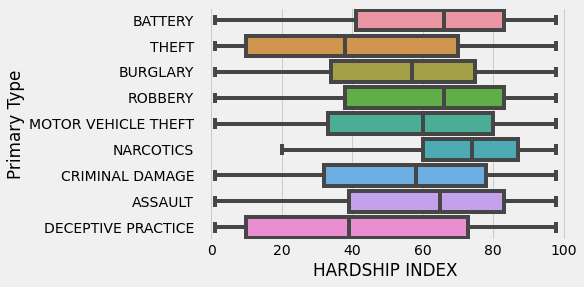

In [422]:
sns.boxplot(x= df13["HARDSHIP INDEX"],showfliers=False, y =df13['Primary Type'] )
# plt.scatter(df13["HARDSHIP INDEX"],df13['Primary Type'], alpha = .005)

<AxesSubplot:xlabel='PERCENT AGED UNDER 18 OR OVER 64', ylabel='Primary Type'>

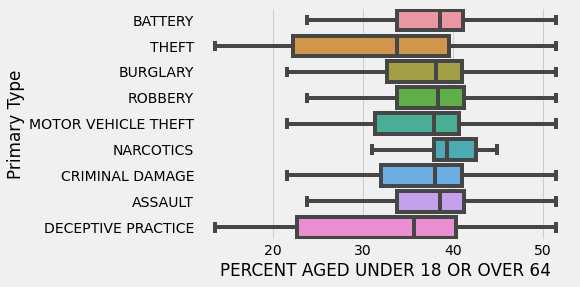

In [423]:
sns.boxplot(x= df13["PERCENT AGED UNDER 18 OR OVER 64"],showfliers=False, y =df13['Primary Type'] )


In [238]:
df23 = df13['Community Area'].sort_values()

In [240]:
df23

201876    1.0
204219    1.0
204220    1.0
204221    1.0
204222    1.0
         ... 
262454    9.0
262455    9.0
262456    9.0
262446    9.0
262326    9.0
Name: Community Area, Length: 257783, dtype: object

Text(0.5, 1.0, 'Community Area ')

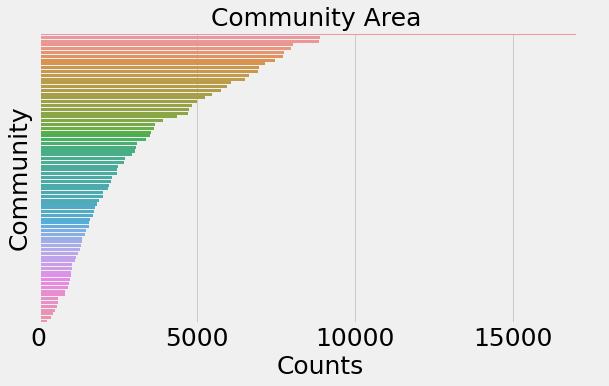

In [281]:
plt.figure(figsize=[9,5])
plot1 = sns.countplot(data=df13, y="Community Area",order=df13['Community Area'].value_counts(ascending=False).index)
plot1.set(yticklabels = [])
plot1.tick_params(axis='both', which='major', labelsize=25)
# plot1.legend(["Yes","No"], fontsize=25)
ax.tick_params(left=False, bottom=False)
plt.ylabel('Community', fontsize=25)
plt.xlabel('Counts', fontsize=25)
plt.title('Community Area ', fontsize=25)

In [201]:
type(df13['PERCENT HOUSEHOLDS BELOW POVERTY'][0])

numpy.float64

In [206]:
df13['PERCENT HOUSEHOLDS BELOW POVERTY'].max()

56.5

In [ ]:
df14 = df13['PERCENT HOUSEHOLDS BELOW POVERTY'].apply(lambda x: 1 if x <10 else 2 if (x >=10 & x <20) else 3 if (x >=20 & x <30) else 4 if (x >=30 & x <40) else 5 if (x >=40 & x =<50)  else 6 if x >=50)

In [338]:
# df14 = df13['PERCENT HOUSEHOLDS BELOW POVERTY'].apply(lambda x: 1 if (x <10) else 2 if ((x >=10) and if (x <20)))

In [337]:
# plt.figure(figsize=[9,5])
# plot1 = sns.countplot(data=df14, y="PERCENT HOUSEHOLDS BELOW POVERTY")
# # plot1.set(xticklabels = ["Mostly A’s","Mostly B’s","Mostly C’s","Mostly D’s"])
# plot1.tick_params(axis='both', which='major', labelsize=25)
# # plot1.legend(["Yes","No"], fontsize=25)
# plt.ylabel('Type of Crime', fontsize=25)
# plt.xlabel('Counts', fontsize=25)
# plt.title('PERCENT HOUSEHOLDS BELOW POVERTY', fontsize=25)